# EJERCICIO 1

## A) Respecto la distribución de Weibull, modificar el código para obtener una distribución de duración de vida de tasa de fallo positiva, constante o negativa mostrando las figuras de dichas distribuciones.

Sea $X \sim Weibull(\lambda, k)$ su función de densidad para $x\ge 0$ y $\lambda > 0$ es:
$$f(x) = \frac{k}{\lambda}\left(\frac{x}{\lambda}\right)^{k-1}e^{-(x/\lambda)^k}$$

donde $\Lambda(x)=\left(\frac{x}{\lambda}\right)^{k}$ es la tasa de fallo acumulada.

(En el ejercicio se ha usado la parametrización: $h=\frac{k}{\lambda^k}$; $c=k$)

Teniendo en cuenta la distribución y la parametrización propuesta (común en CCSS), la tasa de fallo se define como:

$$\frac{d\Lambda(x)}{dx} = \frac{k-1}{\lambda}\left(\frac{x}{\lambda}\right)^{k-1} = \left(1-\frac{1}{c}\right)hx^{c-1}$$

Por ser $x, h, c > 0$, se deduce directamente que:

- La tasa de fallo aumenta si $\Lambda'(x) > 0$, es decir, si $c>1$.
- La tasa de fallo disminuye si $\Lambda'(x) <0$, es decir, si $c<1$. 
- La tasa de fallo se mantiene constante si $\Lambda'(x) = 0$, es decir, si $c=1$. Nótese que en este caso se tiene la distribución exponencial de parámetro $1/\lambda$, la cual precisamente modeliza eventos continuos e independientes a una tasa promedio constante.

A continuación se muestra algunos ejemplos modificando el código propuesto. La escala izquierda es la densidad y la escala derecha es la tasa de fallo.

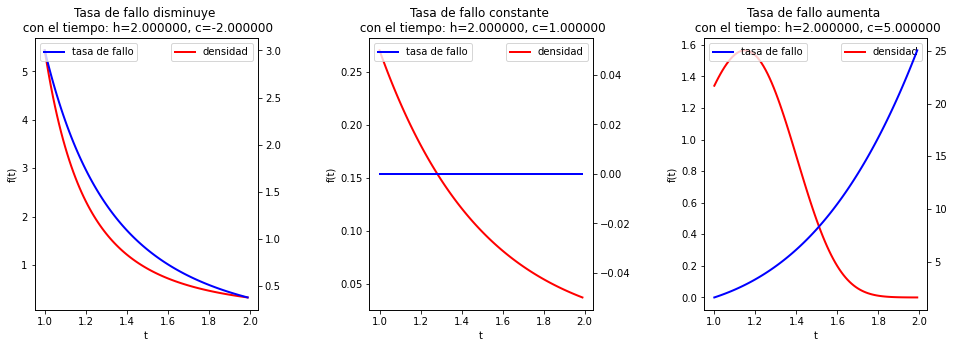

In [1]:
# Distribución Weibull

import numpy as np # importando numpy
from scipy import stats # importando scipy.stats
import pandas as pd # importando pandas
# Muy importante, que los gráficos salgan embebidos en la página.
%matplotlib inline 
# Importar la librería de visualización gráfica
import matplotlib.pyplot as plt # importando matplotlib


tmin, tmax = 1, 1000
t= np.linspace(tmin, tmax, tmax*100)
# media de la muestra seleccionanda al azar
xfSize=16
yfSize=5
plt.figure(figsize=(xfSize, yfSize))

ax1 = plt.subplot(1, 3, 1);
# parámetros h y c 
h, c = 2, -2
W=(h*(t**(c-1))) * np.exp( - (h/c)*(t**c))
L = (1-1/c)*h*t**(c-1)
plt.title('Tasa de fallo disminuye \n con el tiempo: h=%f, c=%f'%(h,c))
plt.xlabel('t')
plt.ylabel('f(t)')
_ =ax1.plot(t[0:100], W[0:100], linewidth=2, color='r')
plt.legend(['densidad'], loc='upper right')

ax2=ax1.twinx()
_ =ax2.plot(t[0:100], L[0:100], linewidth=2, color='b')
plt.legend(['tasa de fallo'], loc='upper left')

ax3 = plt.subplot(1, 3, 2);
# parámetros h y c 
h, c = 2, 1
W=(h*(t**(c-1))) * np.exp( - (h/c)*(t**c))
L = (1-1/c)*h*t**(c-1)
plt.title('Tasa de fallo constante \n con el tiempo: h=%f, c=%f'%(h,c))
plt.xlabel('t')
plt.ylabel('f(t)')
_ =ax3.plot(t[0:100], W[0:100], linewidth=2, color='r')
plt.legend(['densidad'], loc='upper right')

ax4=ax3.twinx()
_ =ax4.plot(t[0:100], L[0:100], linewidth=2, color='b')
plt.legend(['tasa de fallo'], loc='upper left')

# jugar con este código y ver cuando recuperais la distribución geométrica pura

ax5 = plt.subplot(1, 3, 3);
# parámetros h y c 
h, c = 2, 5
W=(h*(t**(c-1))) * np.exp( - (h/c)*(t**c))
L = (1-1/c)*h*t**(c-1)
plt.title('Tasa de fallo aumenta \n con el tiempo: h=%f, c=%f'%(h,c))
plt.xlabel('t')
plt.ylabel('f(t)')
_ =ax5.plot(t[0:100], W[0:100], linewidth=2, color='r')
plt.legend(['densidad'], loc='upper right')

ax6=ax5.twinx()
_ =ax6.plot(t[0:100], L[0:100], linewidth=2, color='b')
plt.legend(['tasa de fallo'], loc='upper left')

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=.5, hspace=1)

## Por último modificar debilmente el código que os doy de Weibull para  obtener la distribución geométrica pura explicando porque se obtiene.

Se va a demostrar un caso particular en que la distribución de Weibull se aproxima a la distribución geométrica.

Consideremos el desarollo de Taylor alrededor de x=0 de la función $ln(1-x)$:

$$ln(1-x) = -\sum_{i=1}^{\infty}{\frac{x^n}{n}} = -x -\frac{x^2}{2} - \cdots$$

de donde se deduce que, si $x \longrightarrow 0^{+}$ entonces se cumple que $ln(1-x)\longrightarrow -x$, y por tanto, que $1-x\longrightarrow e^{-x}$. 

**(Nótese que si x=0, entonces $ln(1-0) = ln(1) = 0$ y se cumple la igualdad $ln(1-x) = -x$)

Ahora, consideremos una variable aleatoria $X \sim geom(p)$. Por el argumento anterior, si $p\longrightarrow 0^+$ se tiene que:

$$P\lbrace X = k+1\rbrace = p(1-p)^k \approx pe^{-kp}$$

es decir, la función de probabilidad de la geométrica es aproximadamente la de una distribución exponencial de parámetro $\lambda = p$. 

Por último, si consideramos una variable aleatoria $Y \sim Weibull(\lambda, k)$ tal que:

$$f_{\lambda, k}(y) = \frac{k}{\lambda}\left(\frac{y}{\lambda}\right)^{k-1}e^{-\left( \frac{y}{\lambda}\right)^k}$$

y haciendo $k=1$, se tiene:

$$f_{\lambda, 1}(y) = \frac{1}{\lambda}e^{- \frac{y}{\lambda}}$$

que es precisamente la función de densidad de la distribución exponencial con parámetro $1/\lambda$.

De este último resultado se deduce el resultado pedido:

$$f_{\lambda, 1}(y) = \frac{1}{\lambda}e^{- \frac{y}{\lambda}} \approx \frac{1}{\lambda}\left(1-\frac{1}{\lambda}\right)^y = P\lbrace X=y+1\rbrace$$ 

asumiendo, por supuesto, que $y \in Z^+$ en la última expresión.

Tomando las ideas de la demostración anterior, para ver la convergencia de la distribución geométrica a la distribución de Weibull, se toma la distribución de Weibull de los códigos anteriores para $c=1$ y $p\longrightarrow 0^+$ (pongamos $p=0.1$). Se aprecia que las probabilidades que arrojan son muy similares.

De hecho, como se puede ver en el desarrollo de Taylor del inicio de la prueba anterior, la distribución geométrica sobreestima a la de Weibull ligeramente.

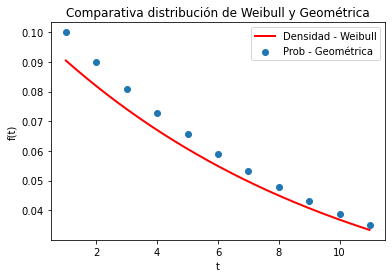

In [2]:
p=.1
k = np.array(range(1, 12))

plt.scatter(k, (p*(1-p)**(k-1)))

h, c = .1, 1
W=(h*(t**(c-1))) * np.exp( - (h/c)*(t**c))
plt.title('Comparativa distribución de Weibull y Geométrica')
plt.xlabel('t')
plt.ylabel('f(t)')
_ =plt.plot(t[0:1000], W[0:1000], linewidth=2, color='r')

plt.legend(['Densidad - Weibull', 'Prob - Geométrica'])
plt.show()

## B) Razonar y explicar como se ha realizado y se ha graficado la distribución de "Student" simulada, a partir de los códigos anteriores.

Primero se generan 100.000 muestras de 100 observaciones de una variable $X \sim N(0, 1)$. Despues se suman los 100 valores de cada muestra para obtener una muestra de 100.000 observaciones de una variable $Y = \sum_{i=1}^{100}{X_i^2} \sim \chi^2_{100}$. Después, se divide cada valor por sus grados de libertad y se aplica una raíz cuadrada, es decir, se calcula la variable $S = \sqrt{\frac{Y}{100}} = \sqrt{\frac{\chi^2_{100}}{100}}$.

Finalmente, para obtener una $t$ de Student, se dividen los valores de la normal $X$ entre los valores de la variable $S$:

$$T = \frac{X}{S} = \frac{Z}{\sqrt{\frac{\chi^2_{100}}{100}}}$$

## Demostrar gráficamente como en el límite de los grados de libertad hacía infinito, la variable t de Student tiende a una normal.

Para esta parte, se van a generar muestras de una t de Student de tamaño 1000 para grados de libertad: 5, 10, 20, 50, 100 y 1000. Y se va a comparar gráficamente la distribución con la de una normal $N(0,1)$. Se aprecia como a medida que crece el número de grados de libertad, las funciones de densidad de las $t$ son más similares a las de una normal, al mismo tiempo que las colas de la distribución son más similares a las de la normal. En el gráfico se muestran los grados de libertas y los valores tanto muestrales como teóricos de las medias y varianzas.

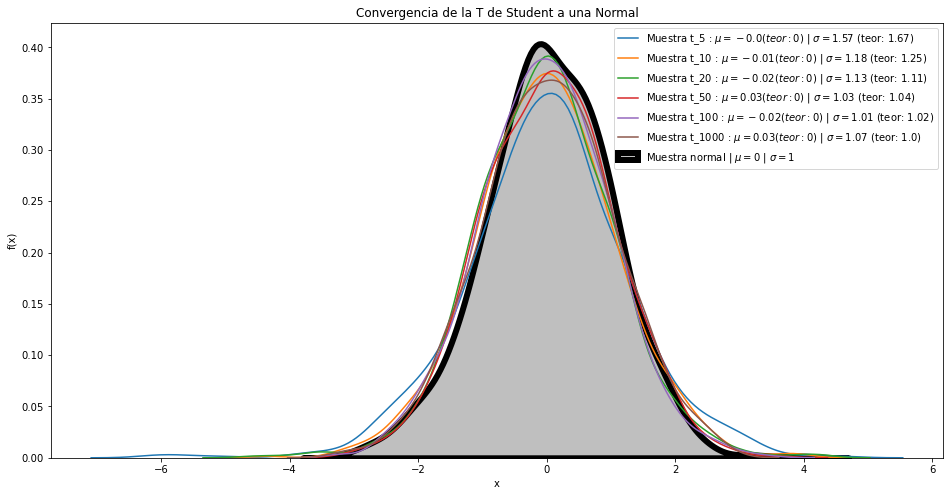

In [3]:
import seaborn as sns

np.random.seed(1)
size=1000
samples = []
df = [5, 10, 20, 50, 100, 1000]
mu, sigma = 0, 1
normal_sample = np.random.normal(mu, sigma, size)

plt.figure(figsize=(16,8))

means, sigmas = [], []
for d in df:
    sample=np.random.standard_t(df=d, size=size)
    samples.append(sample), means.append(np.mean(sample)), sigmas.append(np.var(sample))
    
for sample in samples:
    
    sns.kdeplot(sample)

sns.kdeplot(normal_sample, fill=True, color='black', linewidth=6)

plt.legend([f'Muestra t_{d} : $\mu={round(means[ind], 2)} (teor: {0})$ | $\sigma={round(sigmas[ind], 2)}$ (teor: {round(d/(d-2), 2)})' for ind, d in enumerate(df)]+['Muestra normal | $\mu=0$ | $\sigma=1$'])
plt.title('Convergencia de la T de Student a una Normal')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.show()

# EJERCICIO 2

## Demostrar gráficamente como la identificación del modelo de Poisson se realiza de una manera más correcta cuando se cambian los parámetros de la muestra. Ayúdate para demostrar esto del ajuste de una regresión lineal, para obtener la pendiente, ordenada el origen y así la calidad del ajuste.

In [4]:
# Identificación de una posible Poisson
import numpy as np # importando numpy
from scipy import stats # importando scipy.stats
import pandas as pd # importando pandas
# Muy importante, que los gráficos salgan embebidos en la página.
%matplotlib inline 
# Importar la librería de visualización gráfica
import matplotlib.pyplot as plt # importando matplotlib
#np.random.seed(1111111) # para poder replicar los resultados
#from math import factorial # no esta vectorizada
from scipy.special import factorial
import scipy.misc #para el factorial vectorizado
from sklearn.linear_model import LinearRegression

def identificacion_poisson(Lambda):
    np.random.seed(0)
    muestras=300
    precision=0.001
    x_p = np.random.poisson(Lambda,size=(muestras, 1)) # datos distribuidos según una Poisson

    # Cálculo de las frecuencias a través de un hitograma de tamaño de bin igual al dato
    min=np.amin(x_p) #¿no es palabra reservada del lenguaje...?
    max=np.amax(x_p)
    bins=(max-min)+1

    plt.figure(figsize=(10, 7))
    plt.subplot(1, 2, 1);
    neventos, posicion_bins, basura = plt.hist(x_p, bins)
    plt.title('Poisson $\lambda$=%d'%Lambda)
    plt.xlabel('$P(x;\lambda)$')
    plt.ylabel('# eventos')

    plt.subplot(1, 2, 2);
    f_ob=neventos
    X= np.linspace(min, max, bins) #espaciado lineal de min a max de uno en uno
    Y_x=np.log(f_ob+precision)+np.log(factorial(X))

    LR = LinearRegression().fit(X.reshape(-1,1), Y_x)
    R=LR.score(X.reshape(-1,1), Y_x)

    _=plt.plot(X, Y_x)
    _=plt.plot(X, LR.coef_[0]*X+LR.intercept_, c='r')
    #x_p, neventos, posicion_bins, bins, X, Y_x, f_ob
    plt.legend(['Resultado muestral', f'Resultado teorico: {round(LR.coef_[0], 2)}X+{round(LR.intercept_, 2)} | $R^2$={round(R**2, 2)}'])

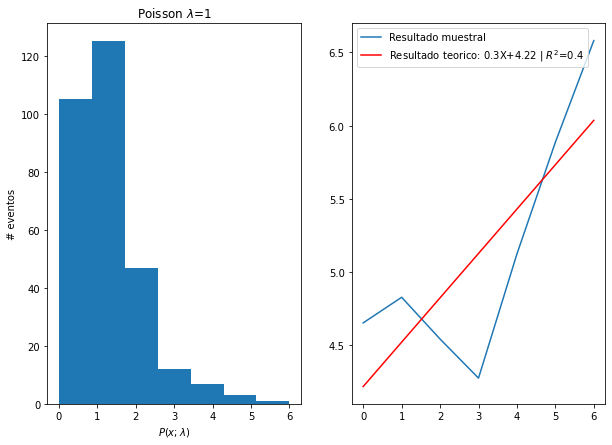

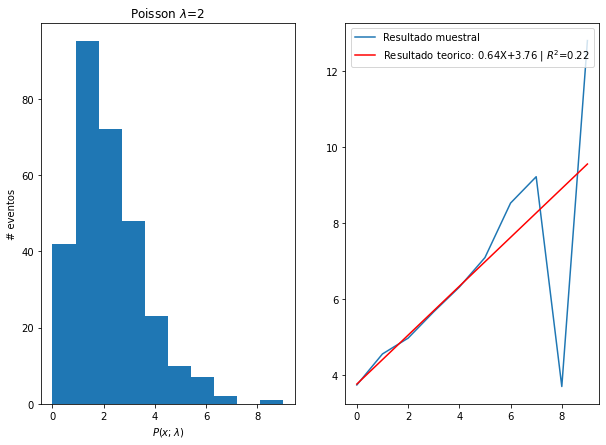

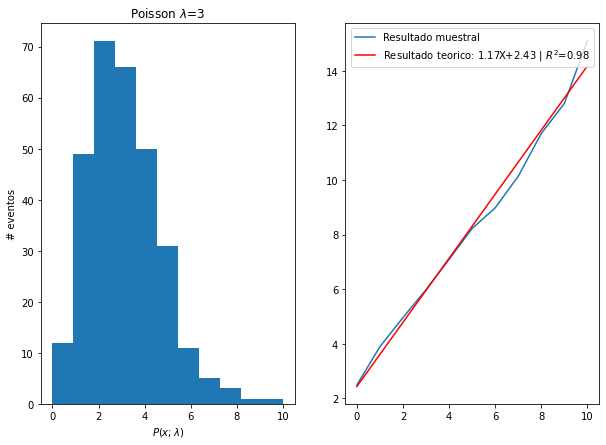

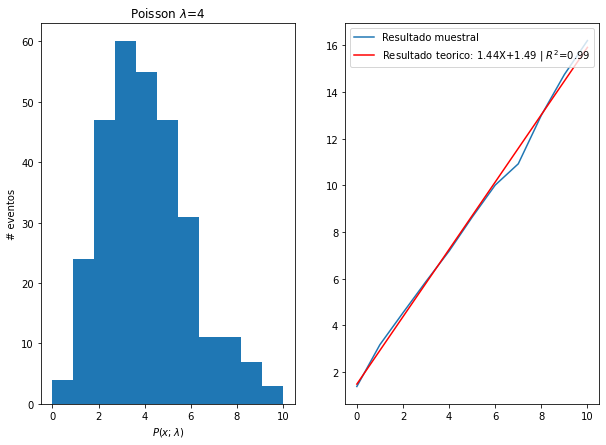

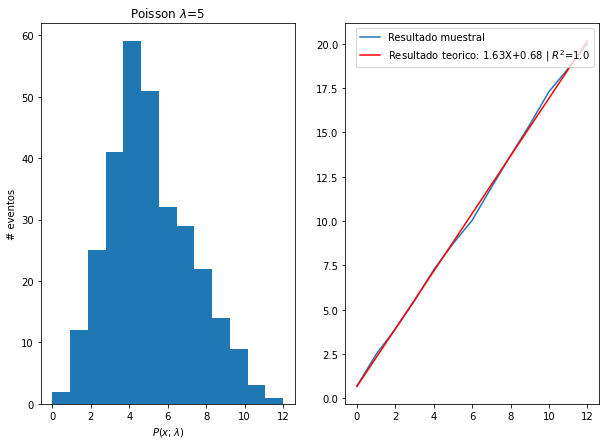

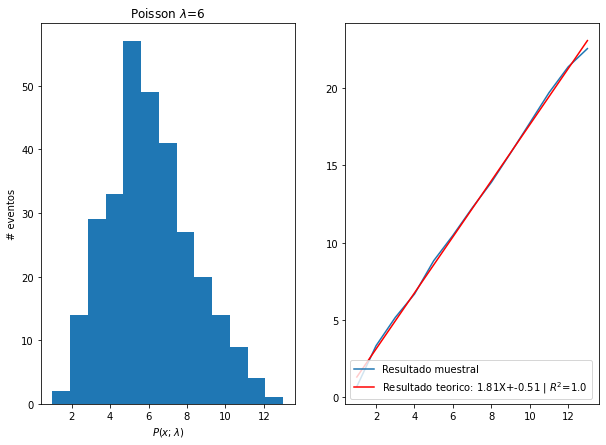

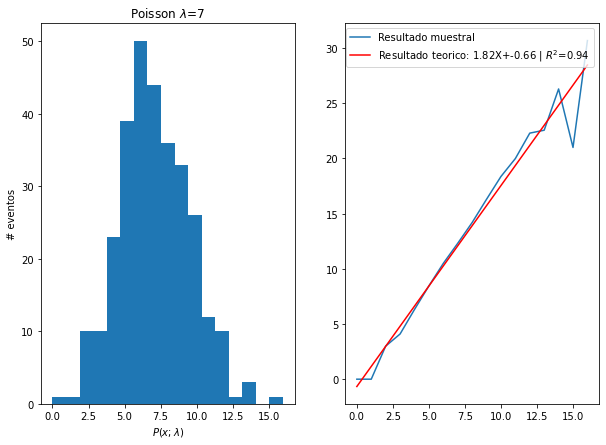

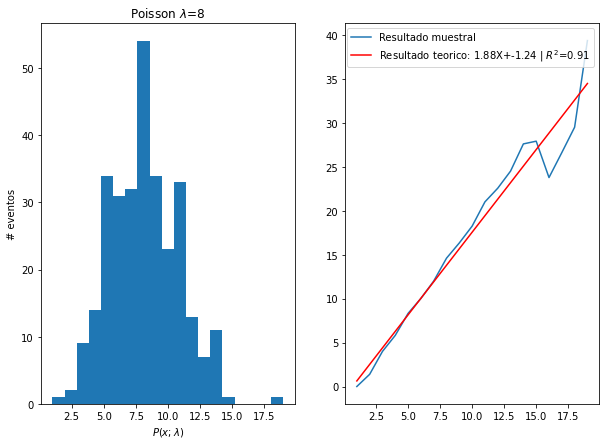

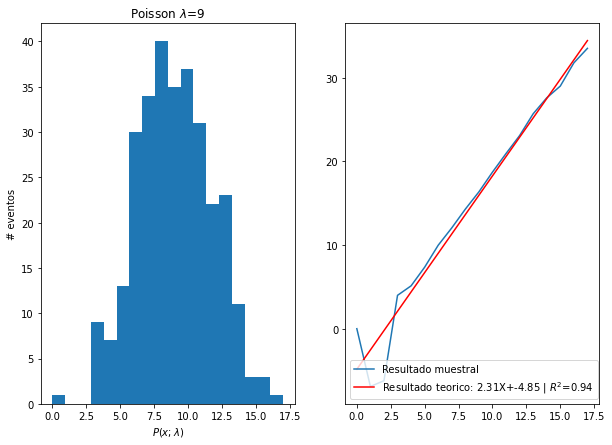

In [5]:
for lamb in range(1, 10):
    
    identificacion_poisson(lamb)

Se observa que para valores de $\lambda$ moderados (3,4,5,6), el método propuesto es adecuado, sin embargo, si es muy pequeño o muy grande, el número de bins distorisiona los valores teóricos para cada número de ocurrencias, apareciendo una curva (gráfico derecha) muy volátil, aunque cerca del centro de la distribución el método continua funcionando adecuadamente.

# Ejercicio 3

## Calcular los parámetros de la distribución muestral de las medias para una variable aleatoria binomial, explorando los límites de convergencia de los parámetros. 

Para probar este resultado usaremos la propiedad reproductiva de la distribución normal y vamos a asumir que en cada muestra de $X \sim B(n, p)$ se cumplen las condiciones para aplicar el TCL tal que $X \approx N(np, \sqrt{np(1-p})$.

Ahora bien, sabiendo que la distribución normal es reproductiva (esto es, si $X \sim (\mu_1, \sigma_1)$ e $Y \sim N(\mu_2, \sigma_2)$ entonces $X+Y \sim N(\mu_1+\mu_2, \sqrt{\sigma_1^2+\sigma_2^2})$) y considerando $X_i$ la variable $X$ en la muestra $i$ se tiene que:

$$\bar{x}_m = \frac{1}{m}\sum^m{X_i} \sim N(\frac{mnp}{m}, \frac{1}{m}\sqrt{mnp(1-p)} = N(np, \sqrt{\frac{np(1-p)}{m}})$$

Por tanto, segun la distribución en el muestreo de la media muestral, la media teórica de las medias muestrales es $np$ y su desviación típica es $\sqrt{\frac{np(1-p)}{m}}$.

A continuación se muestra un experimento para $n=40$, $m=100$ y $p=1/4$ para 5000 muestras (por continuar con los valores de ejemplo de los apuntes). Se comprueba experimentalmente que el histograma muestra signos de normalidad, apoyando la hipótesis del desarrollo anterior.

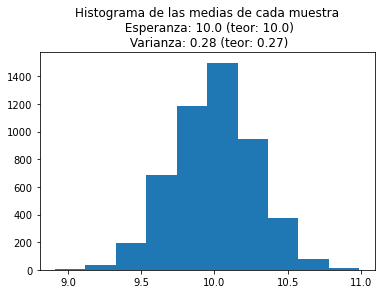

In [130]:
np.random.seed(0)

tamano_muestra, num_muestras = 100, 5000 #dimensiones del experimento
n, p = 40, .25 # parametros binomial

valor_teorico_sigma = np.sqrt(n*p*(1-p)/tamano_muestra)
valor_teorico_mu = n*p

muestras_binomiales = np.random.binomial(n=n, p=p, size=(tamano_muestra, num_muestras))
esperanzas = np.mean(muestras_binomiales, axis=0)

plt.hist(esperanzas)
plt.title(f'Histograma de las medias de cada muestra\n Esperanza: {round(np.mean(esperanzas), 2)} (teor: {round(valor_teorico_mu, 2)})\n Varianza: {round(np.std(esperanzas), 2)} (teor: {round(valor_teorico_sigma, 2)})')
plt.show()

En el siguiente experimento se puede observar la convergencia de la media y desviación típica muestrales a los valores teóricos de la distribución en el muestreo a medida que aumenta el número de muestras.

In [133]:
np.random.seed(0)
valores_medias, valores_sigmas = [], []

valor_teorico_sigma = np.sqrt(n*p*(1-p)/tamano_muestra)
valor_teorico_mu = n*p
tamanos = range(1, 5000)

for tam_muestral in tamanos:
    
    tamano_muestra, num_muestras = tamano_muestra, tam_muestral #dimensiones del experimento
    muestras_binomiales = np.random.binomial(n=n, p=p, size=(tamano_muestra, num_muestras))
    esperanzas = np.mean(muestras_binomiales, axis=0)
    
    valores_medias.append(np.mean(esperanzas)), valores_sigmas.append(np.std(esperanzas))

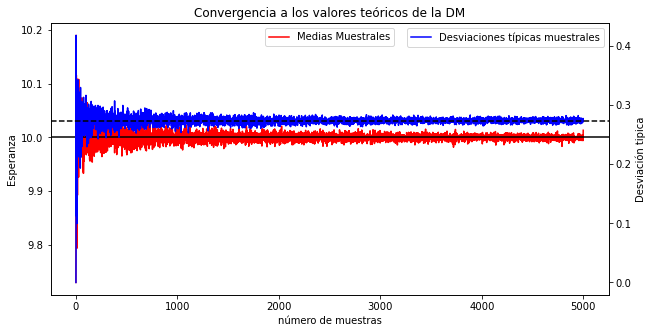

In [134]:
fig, ax = plt.subplots(figsize=(10, 5))

ax.plot(tamanos, valores_medias, c='r')
plt.xlabel('número de muestras')
plt.ylabel('Esperanza')
plt.legend(['Medias Muestrales'], loc='upper center')
ax2 = ax.twinx()
ax2.plot(tamanos, valores_sigmas, c='b')
plt.ylabel('Desviación tipica')
plt.legend(['Desviaciones típicas muestrales'], loc='upper right')
plt.title('Convergencia a los valores teóricos de la DM')

ax.axhline(y=valor_teorico_mu, c='black')
ax2.axhline(y=valor_teorico_sigma, c='black', linestyle='--')

En el gráfico superior se aprecia que a medida que crece el número de muestras, más similares son los valores muestrales a los teóricos.

A modo de conslusión, siempre que se pueda aplicar el teorema central de límite, la distribución en el muestreo de la media muestral es:
$$\bar{x}_n \sim N \left(\mu, \frac{\sigma}{\sqrt{n}}\right)$$

# EJERCICIO 4

## Calcular y dibujar la función verosimilitud y soporte para el parámetro  $\mu$ de la distribución normal de varianza 1.

Dada una variable aleatoria $X$ con función de densidad $f_\theta(x)$ y una muestra aleatoria simple de tamaño $n$ de $X$, se define la función de verosimilitud de la muestra como: (nótese que el muestreo aletorio simple implica v.a.i.i.d)

$$f_{\theta}(x_1,\ldots, x_n) = \prod^{n}{f_{\theta}(x_i)}$$

Es importante señalar que la función de verosimilitud depende de los parámetros de la distribución y no de la muestra. Ahora bien, considerando la densidad normal y operando en la expresión anterior se tiene:

$$V_{\mu, \sigma}(x_1,\ldots,x_n) = \prod_{i=1}^{n}{\left(\frac{1}{\sqrt{2\pi}\sigma}\right) e^{-\frac{1}{2\sigma^2} (x_i - \mu)^2}} = 
\left(\frac{1}{\sqrt{2\pi}\sigma}\right)^n e^{-\frac{1}{2\sigma^2} \sum_{i=1}^{n}{(x_i-\mu)^2}}
$$

La función soporte se obtiene aplicando logaritmos a la ecuación anterior:
    
$$L(\mu, \sigma) = log(V_{\mu, \sigma}) = -nlog(2\pi) - nlog(\sigma) - \frac{1}{2\sigma^2}\sum_{i=1}^{n}{(x_i-\mu)^2}$$

Ahora bien, se pide el resultado para la media de $X \sim N(0, 1)$, por tanto, se asume que $\sigma=1$ y se hace una gráfica de ambas funciones para una muestra aleatoria simple de tamaño $n=50$ y $\mu \in [-5, 5]$. Para valores muy altos de $n$ se produce un overflow porque la verosimilitud toma valores extremadamente pequeños.

In [203]:
n=50
sigma = 1
muestra = np.random.randn(n)
mu = np.linspace(-5, 5, 100)

V = [((1/(np.sqrt(2*np.pi)*sigma))**n)*np.exp(-(1/(2*sigma**2))*np.sum((muestra-mu_pob)**2)) for mu_pob in mu]
L = [-n*np.log(2*np.pi) -n*np.log(sigma) - (1/(2*sigma**2))*np.sum((muestra-mu_pob)**2) for mu_pob in mu]

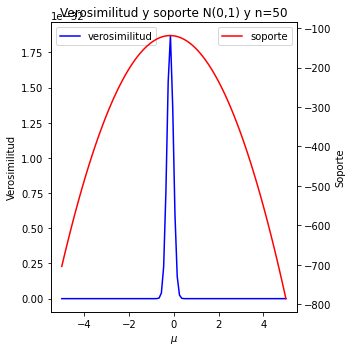

In [204]:
fig, ax = plt.subplots(figsize=(5, 5))

ax.plot(mu, V, c='b')
plt.title('Verosimilitud y soporte N(0,1) y n=50')
plt.legend(['verosimilitud'], loc='upper left')
plt.xlabel('$\mu$')
plt.ylabel('Verosimilitud')
ax2 = ax.twinx()
ax2.plot(mu, L, c='red')
plt.legend(['soporte'], loc='upper right')
plt.ylabel('Soporte')
plt.tight_layout()

Como se puede ver en ambos casos, el máximo de verosimilitud y soporte coincide (el logaritmo es una función monótona creciente) por lo que el estimador de máxima verosimilitud para $\mu$ es un valor cercano a 0 (evidentemente sabemos que es cero, pero si no lo supiéramos, solo podríamos afirmar más que es cercano a cero). Por lo general se suele usar el soporte para las tareas de optimización porque resulta en funciones más manejables a efectos de diferenciación.

# EJERCICIO 5

## Analizar y estudiar como varía la precisión de función de verosimilitud para la normal en función del tamaño de la muestra y los parámetros de la misma.

In [3]:
import numpy as np 
from scipy import stats 
import pandas as pd
import matplotlib.pyplot as plt 
from scipy.special import factorial
from math import log
from math import pi
from math import sqrt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

In [10]:
def verosimilitud_normal(mu, std, n):
    
    np.random.seed(0)
    # parámetros de la normal: 
    mu,s,muestras = mu, std, n
    # creando la muestra de datos
    normal = np.random.normal(mu,s,muestras)
    # Poisson experimental
    #_ = plt.hist(p, 10, density=True)
    # Verosimilitud Poisson
    # Valor de los parámetros mínimos y máximos
    size=300
    MUmin, MUmax = mu-2, mu+2
    MU= np.linspace(MUmin, MUmax,size)
    if (s**2)-2 <0:
        S2min, S2max = 0.001, (s**2)+2
    else:
        S2min, S2max = (s**2)-2, (s**2)+2
    S2= np.linspace(S2min, S2max,size)
    MU_bak=MU
    S2_bak=S2
    # sum_xi-mu2 de la muestra seleccionanda al azar para cada MU
    Sxi_mu2=[];
    for i in range(MU_bak.shape[0]):
        tmp=(normal-MU_bak[i])**2
        Sxi_mu2.append(tmp.sum())

    MU, S2 = np.meshgrid(MU, S2)  
    # funcion de verosimilitud  de la muestra extraida
    l_mu_s=(1.0/((np.sqrt(S2)*sqrt(2.0*pi))**muestras))*np.exp((-1.0/(2.0*S2))*(Sxi_mu2))

    # Pinta el contorno
    plt.figure(1)
    plt.title('Funcion de verosimilitud normal n=%d'%muestras)
    plt.xlabel('$\mu$')
    plt.ylabel('$\sigma^2$')
    plt.contourf(MU, S2, l_mu_s)

    # tamaño contorno
    fig = plt.gcf()
    fig.set_size_inches(10.5, 5.5)

    # muestra contorno
    plt.colorbar()

    # pinta la superficie
    figura_3d=plt.figure(2)
    ax = figura_3d.add_subplot(111, projection='3d')
    surf = ax.plot_surface(MU, S2, l_mu_s,cmap=cm.coolwarm, linewidth=0, antialiased=False)
    plt.title('Funcion de verosimilitud normal n=%d'%muestras)
    plt.xlabel('$\mu$')
    plt.ylabel('$\sigma^2$')
    ax.view_init(45, -45)
    figura_3d.colorbar(surf, shrink=0.5, aspect=8)

    # tamaño figura
    fig = plt.gcf()
    fig.set_size_inches(10.5, 5.5)

    # muestra figura
    plt.show()

Para esta parte del ejercicio hay varios aspectos a comparar relevantes:

1. Aumento del tamaño muestral: Se observa que al aumentar el tamaño muestral, el máximo de la función de verosimilitud se encuentra cada vez más cerca del verdadero valor.

2. Aumento de la desviación típica: Se observa que al aumetar la desviación típica, la verosimilitud toma un rango de valores más alto alrededor del verdadero valor del parámetro. Esto se debe a que las muestras son mas volatiles y pueden aparecen muchos valores alejados del centro de la distribucion.

### 1. Aumeto del tamaño muestral

Se toman los tamaños muestrales 10, 20, 30 y 50 y se observan las funciones de verosimilitud.

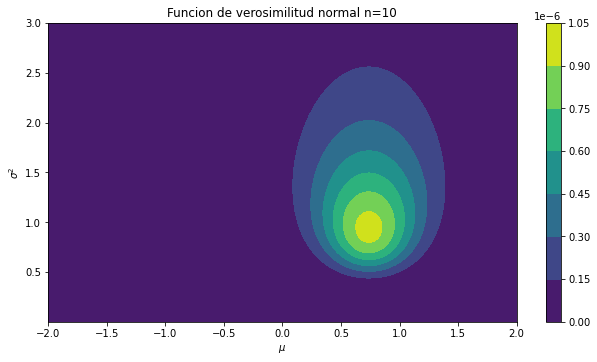

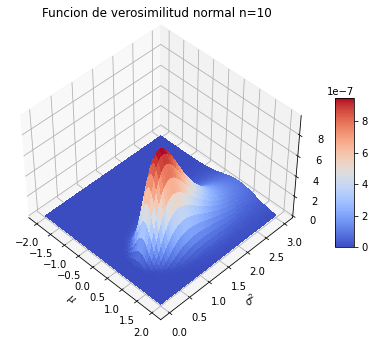

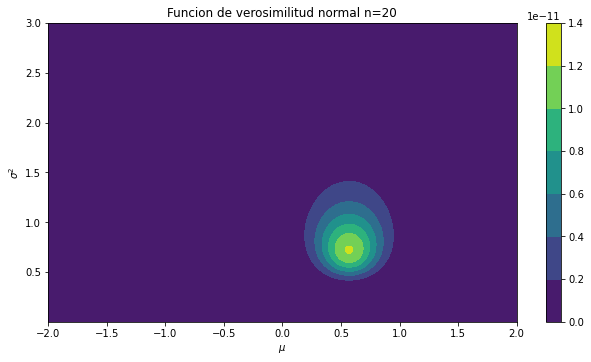

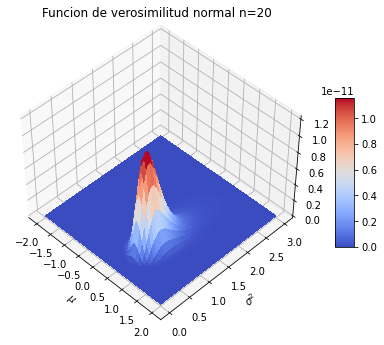

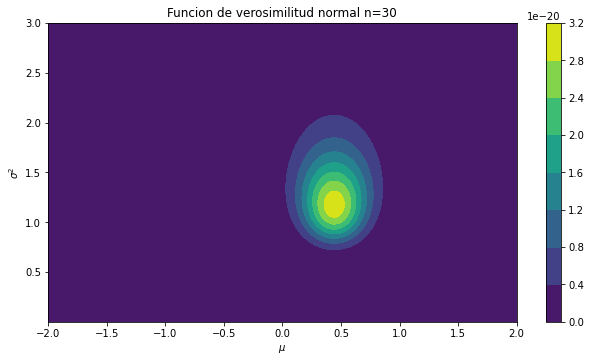

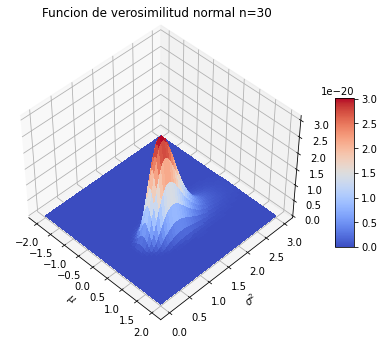

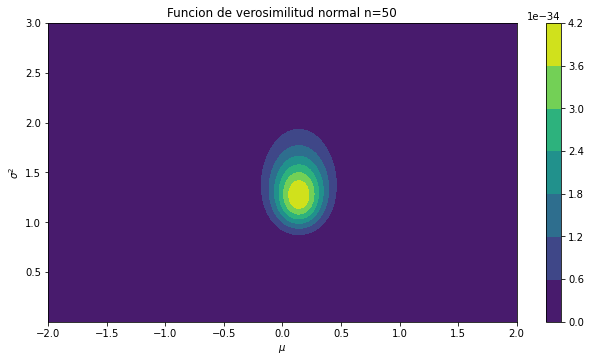

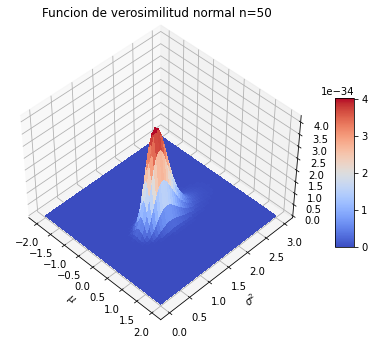

In [15]:
verosimilitud_normal(0, 1, 10)
verosimilitud_normal(0, 1, 20)
verosimilitud_normal(0, 1, 30)
verosimilitud_normal(0, 1, 50)

### 2. Aumento de la desviación típica

Para un tamaño muestral $n=50$ se toman los valores $\sigma \in \lbrace 0.5, 1, 2, 5\rbrace$.

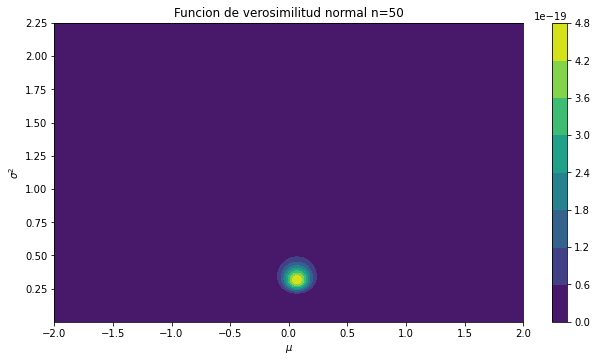

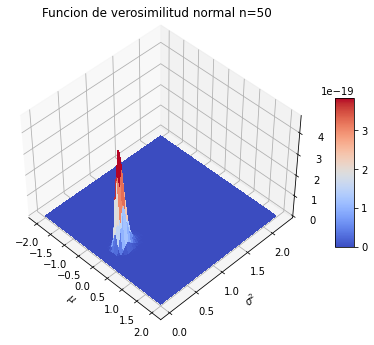

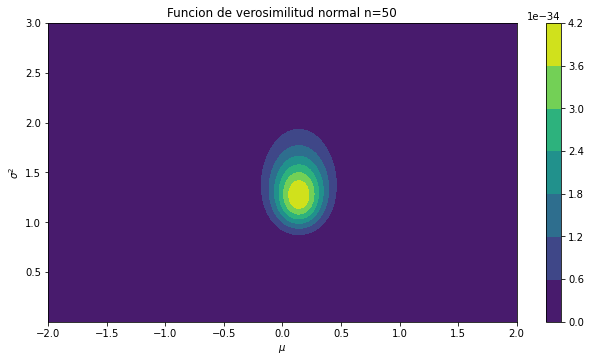

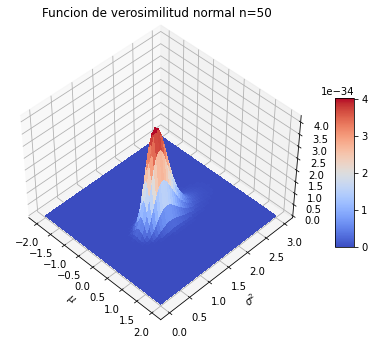

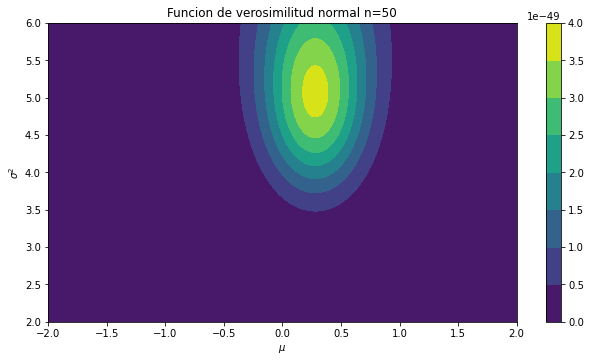

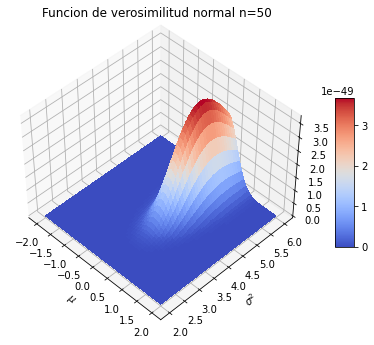

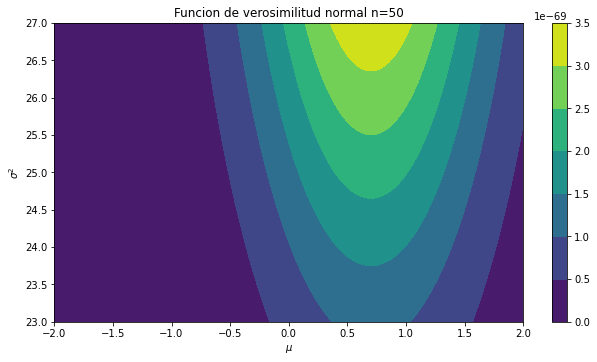

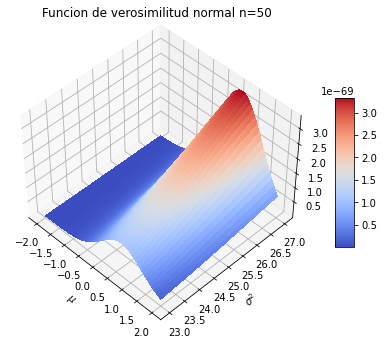

In [17]:
verosimilitud_normal(0, .5, 50)
verosimilitud_normal(0, 1, 50)
verosimilitud_normal(0, 2, 50)
verosimilitud_normal(0, 5, 50)

Se observa que a medida que aumenta la desviacion tipica, la maxima verosimilitud para la media se encuentra cada vez más alejada del verdadero valor $\mu=0$.

## Representar gráficamente la función de soporte para la distribución normal para diferentes muestras y diferentes parámetros de la distribución. Por último, estudiar y analizar como varía la precisión de esta función soporte en función del tamaño de la muestra y los parámetros de la distribución normal.

Dada una variable aleatoria $X \sim N_2(\mu, \Sigma)$ y una muestra aleatoria simple de tamaño $n$, aplicando un procedimiento similar al ejercicio anterior, se tiene que la función de verosimilitud es:

$$V_{\mu, \Sigma}(x_1,\ldots, x_n) = \frac{1}{(2\pi)^n|\Sigma|^{n/2}} e^{-\frac{1}{2}\sum_{i=1}^n{(x_i-\mu)'\Sigma^{-1}(x_i-\mu)}}$$

y, aplicando logaritmos a la expresión anterior, se obtiene la función soporte:

$$L(\mu, \Sigma) = log(V_{\mu, \Sigma}) = -\frac{n}{2}log|\Sigma| - \frac{1}{2}\sum_{i=1}^n{(x_i-\mu)'\Sigma^{-1}(x_i-\mu)}$$

(Nótese que se han despreciado las constantes de la función de verosimilitud al aplicar logaritmos por sencillez en la exposición. Es práctica común en este tipo de desarrollos eliminar las constantes)

In [20]:
def soporte_normal(mu, std, n):
    
    np.random.seed(0)
    # parámetros de la normal: 
    mu,s,muestras = mu, std, n
    # creando la muestra de datos
    normal = np.random.normal(mu,s,muestras)
    # Poisson experimental
    #_ = plt.hist(p, 10, density=True)
    # Verosimilitud Poisson
    # Valor de los parámetros mínimos y máximos
    size=300
    MUmin, MUmax = mu-2, mu+2
    MU= np.linspace(MUmin, MUmax,size)
    if (s**2)-2 <0:
        S2min, S2max = 0.001, (s**2)+2
    else:
        S2min, S2max = (s**2)-2, (s**2)+2
    S2= np.linspace(S2min, S2max,size)
    MU_bak=MU
    S2_bak=S2
    # sum_xi-mu2 de la muestra seleccionanda al azar para cada MU
    Sxi_mu2=[];
    for i in range(MU_bak.shape[0]):
        tmp=(normal-MU_bak[i])**2
        Sxi_mu2.append(tmp.sum())

    MU, S2 = np.meshgrid(MU, S2)  
    # funcion soporte  de la muestra extraida
    #l_mu_s=(1.0/((np.sqrt(S2)*sqrt(2.0*pi))**muestras))*np.exp((-1.0/(2.0*S2))*(Sxi_mu2))
    l_mu_s=-(muestras/2)*np.log(S2)-(1.0/(2.0*S2))*(Sxi_mu2)


    # Pinta el contorno
    plt.figure(1)
    plt.title('Funcion soporte normal n=%d'%muestras)
    plt.xlabel('$\mu$')
    plt.ylabel('$\sigma^2$')
    plt.contourf(MU, S2, l_mu_s)

    # tamaño contorno
    fig = plt.gcf()
    fig.set_size_inches(10.5, 5.5)

    # muestra contorno
    plt.colorbar()

    # pinta la superficie
    figura_3d=plt.figure(2)
    ax = figura_3d.add_subplot(111, projection='3d')
    surf = ax.plot_surface(MU, S2, l_mu_s,cmap=cm.coolwarm, linewidth=0, antialiased=False)
    plt.title('Funcion soporte normal n=%d'%muestras)
    plt.xlabel('$\mu$')
    plt.ylabel('$\sigma^2$')
    ax.view_init(45, -45)
    figura_3d.colorbar(surf, shrink=0.5, aspect=8)

    # tamaño figura
    fig = plt.gcf()
    fig.set_size_inches(10.5, 5.5)

    # muestra figura
    plt.show()

Dado que la función logaritmo es monótona creciente, se mantienen las mismos aspectos relevantes a los que se hacen referencia para la verosimilitud. Se hacen las mismas simulaciones, aumentando el tamaño muestral y aumentando la desviacion tipica.

En el primer caso se ve que al aumentar el tamaño muestral el soporte toma los valores máximos en una región cada vez mas cercana al verdadero valor poblacional. En el segundo caso, al aumentar la desviacion tipica, aparecen más valores atipicos en las muetras y por tanto, la region donde el soporte es maximo se aleja del verdadero valor del parámetro.

### 1. Aumento del tamaño muestral

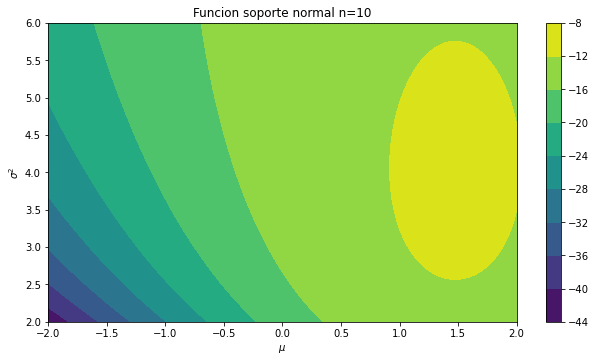

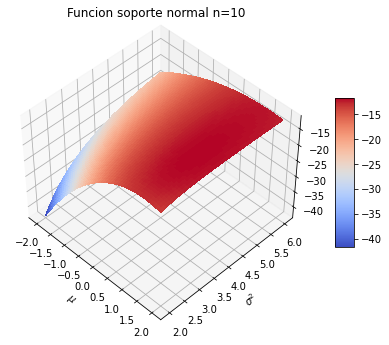

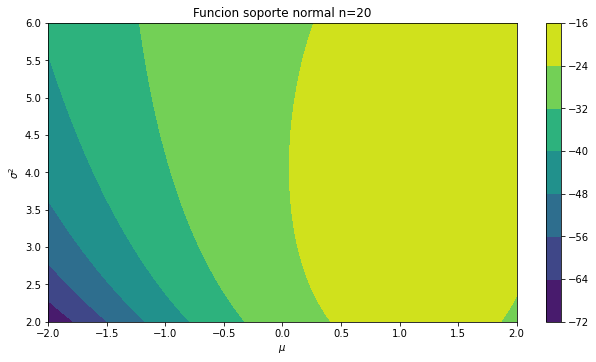

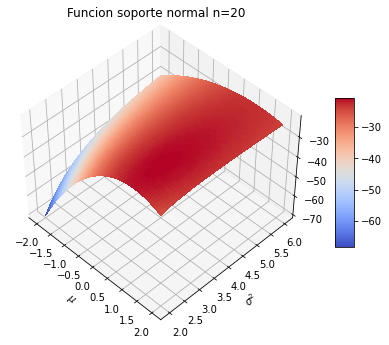

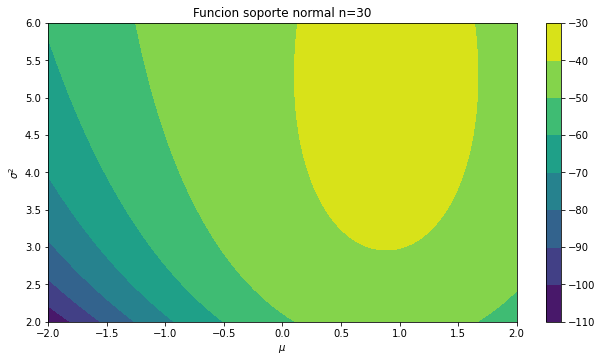

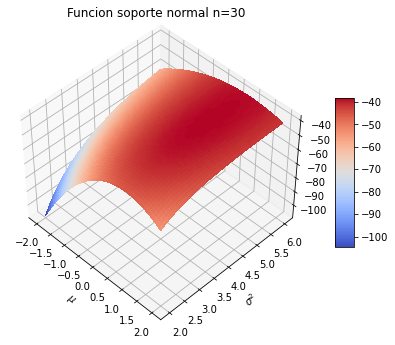

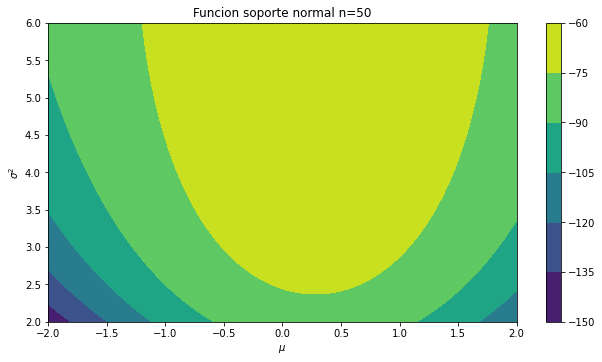

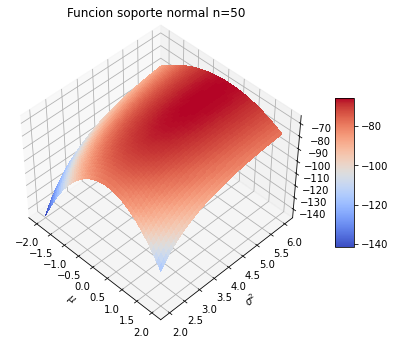

In [37]:
soporte_normal(0, 2, 10)
soporte_normal(0, 2, 20)
soporte_normal(0, 2, 30)
soporte_normal(0, 2, 50)

### 2. Aumento de la desviacion tipica

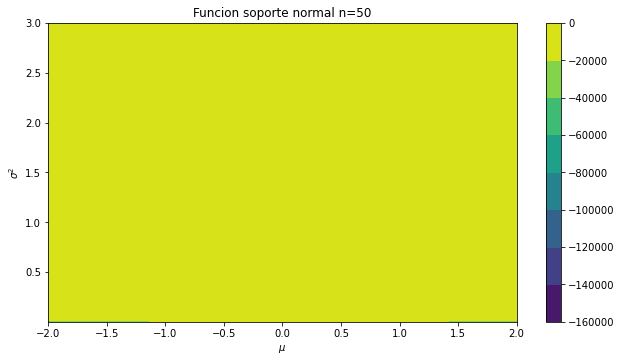

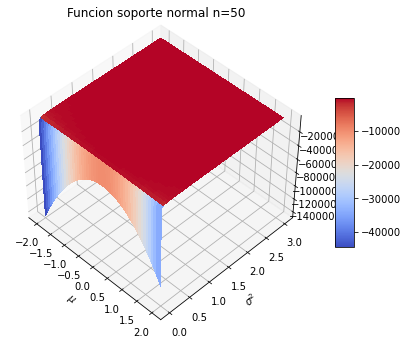

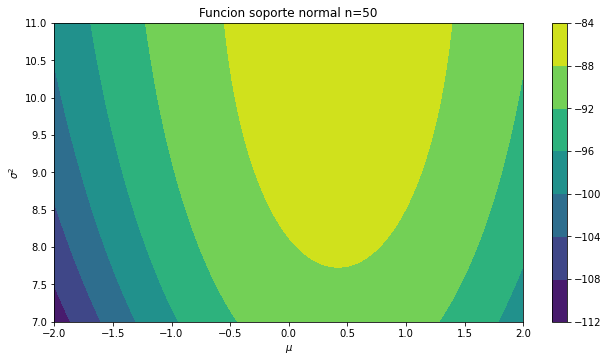

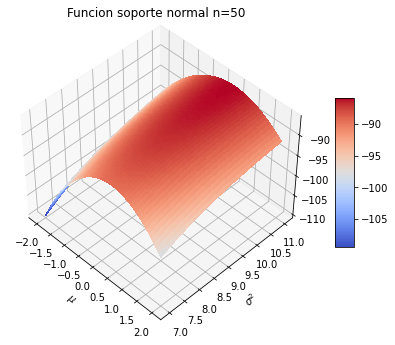

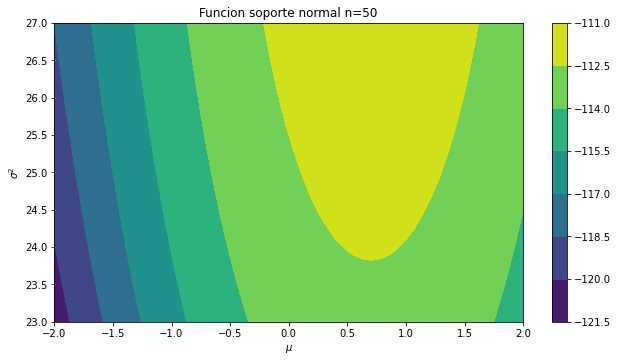

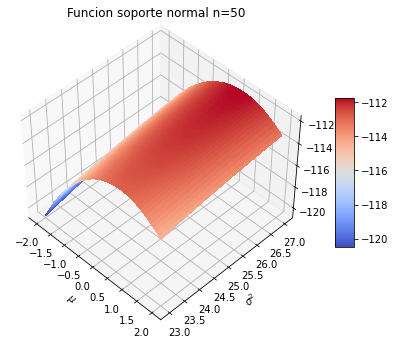

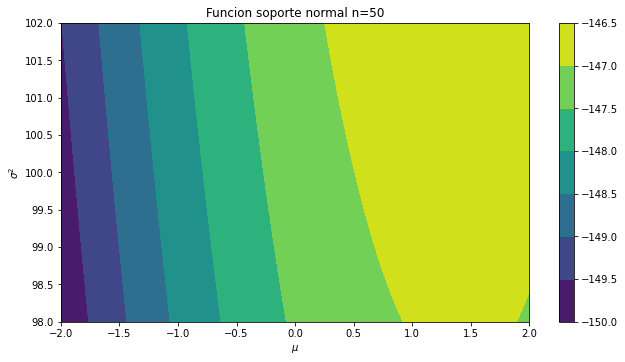

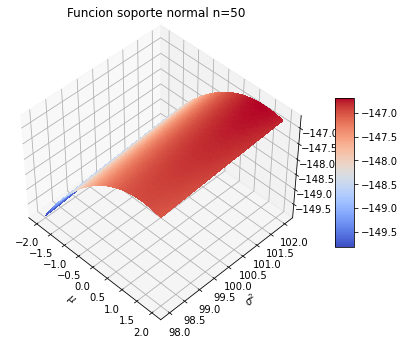

In [40]:
soporte_normal(0, 1, 50)
soporte_normal(0, 3, 50)
soporte_normal(0, 5, 50)
soporte_normal(0, 10, 50)

Notese que si sacamos las curvas de nivel de la función soporte, obtendríamos los mismos resultados que los obtnidos en el ejercicio anterior para el caso univariante.